<a href="https://colab.research.google.com/github/xMessiahx/ENSYS5800-AI-Energy-pai.sha/blob/main/01.%20Course%20Introduction%20and%20Overview/01a.%20Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENSYS 5800: Applications of Artificial Intelligence in Energy Systems

# Introduction

## Example 1.1: Solar PV System Performance

### INGEST: Data Wrangling (Preparation and Inspection)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
plt.style.use('classic')
%matplotlib inline
# change

In [ ]:
# Import data
url="https://storage.googleapis.com/nrel-datahub/NREL_DataHub_PVDAQ"
data=pd.read_csv(url, sep=',', header=None, error_bad_lines=False) 
data.columns = ['Datetime','system_id','ac_power', 'poa_irradiance','ambient_temp', 'wind_speed','soiling']
data['Datetime'] =  pd.to_datetime(data['Datetime'])
data = data.set_index(['Datetime'])

b'Skipping line 8500: expected 7 fields, saw 117\nSkipping line 8863: expected 7 fields, saw 32\nSkipping line 13537: expected 7 fields, saw 2737\nSkipping line 13542: expected 7 fields, saw 12\nSkipping line 34453: expected 7 fields, saw 27\nSkipping line 34509: expected 7 fields, saw 27\nSkipping line 50945: expected 7 fields, saw 20342\nSkipping line 53304: expected 7 fields, saw 27\nSkipping line 53587: expected 7 fields, saw 17\nSkipping line 53763: expected 7 fields, saw 27\nSkipping line 67878: expected 7 fields, saw 27\nSkipping line 67919: expected 7 fields, saw 27\nSkipping line 70203: expected 7 fields, saw 27\nSkipping line 71144: expected 7 fields, saw 1642\nSkipping line 104953: expected 7 fields, saw 11282\nSkipping line 105737: expected 7 fields, saw 92\nSkipping line 115698: expected 7 fields, saw 22\nSkipping line 116707: expected 7 fields, saw 32\nSkipping line 116713: expected 7 fields, saw 37\nSkipping line 119348: expected 7 fields, saw 52\n'
b'Skipping line 13623

In [ ]:
data=data.drop(['system_id'], axis=1)
data

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
Datetime,,,,,
2010-02-25 14:16:00,62.464,96.550,4.017,0.564,1.000
2010-02-25 14:17:00,84.915,103.570,3.990,1.004,1.000
2010-02-25 14:18:00,94.197,108.960,3.926,1.459,1.000
2010-02-25 14:19:00,27.059,115.050,3.854,1.326,1.000
2010-02-25 14:20:00,79.618,127.720,3.792,1.899,1.000
...,...,...,...,...,...
2016-12-13 09:53:00,701.066,839.505,1.485,2.357,0.992
2016-12-13 09:54:00,713.114,851.519,1.300,2.453,0.992
2016-12-13 09:55:00,712.889,851.149,1.218,1.338,0.992


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1541277 entries, 2010-02-25 14:16:00 to 2016-12-13 09:57:00
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ac_power        1541277 non-null  float64
 1   poa_irradiance  1541277 non-null  float64
 2   ambient_temp    1541277 non-null  float64
 3   wind_speed      1541277 non-null  float64
 4   soiling         1541277 non-null  float64
dtypes: float64(5)
memory usage: 70.6 MB


Try what-if-tool: https://codelabs.developers.google.com/codelabs/prototyping-caip-notebooks#4

<Figure size 432x288 with 0 Axes>

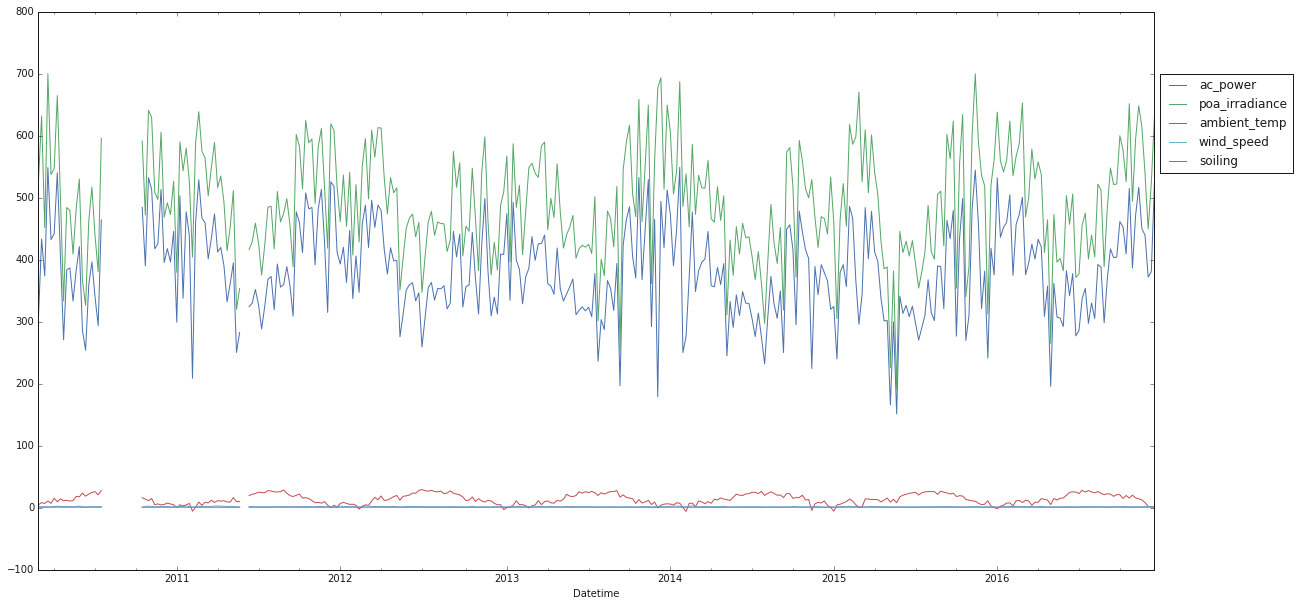

In [ ]:
f=plt.figure()
data.resample('W').mean().plot( figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

<Figure size 432x288 with 0 Axes>

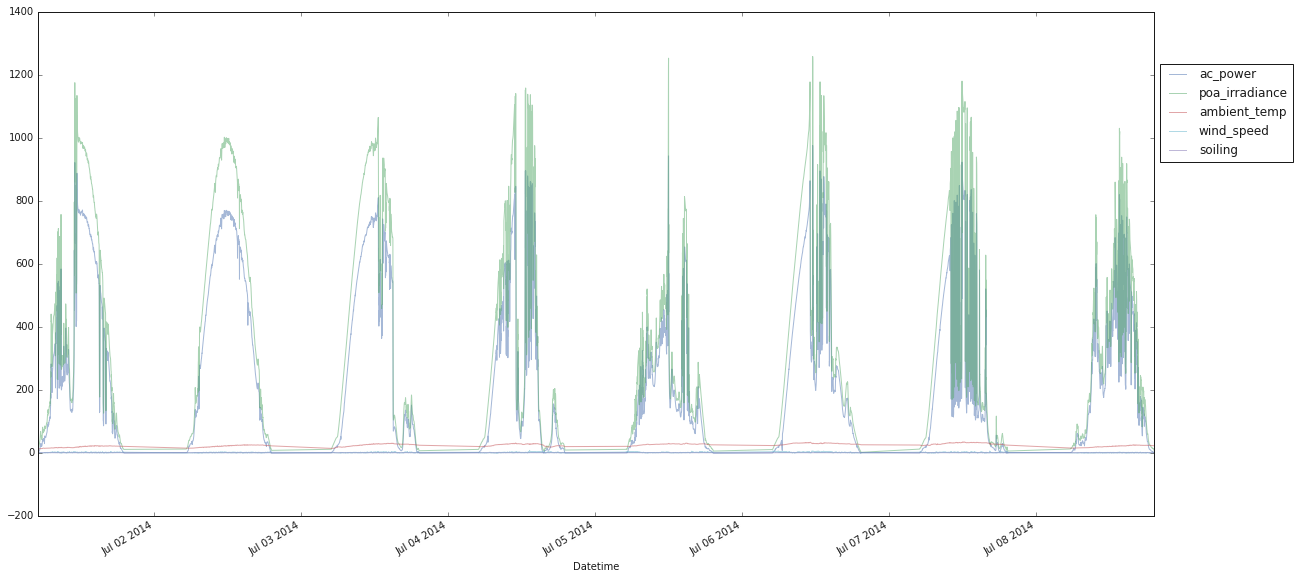

In [ ]:
f=plt.figure()
data['2014-07-01':'2014-07-08'].plot(alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

<Figure size 432x288 with 0 Axes>

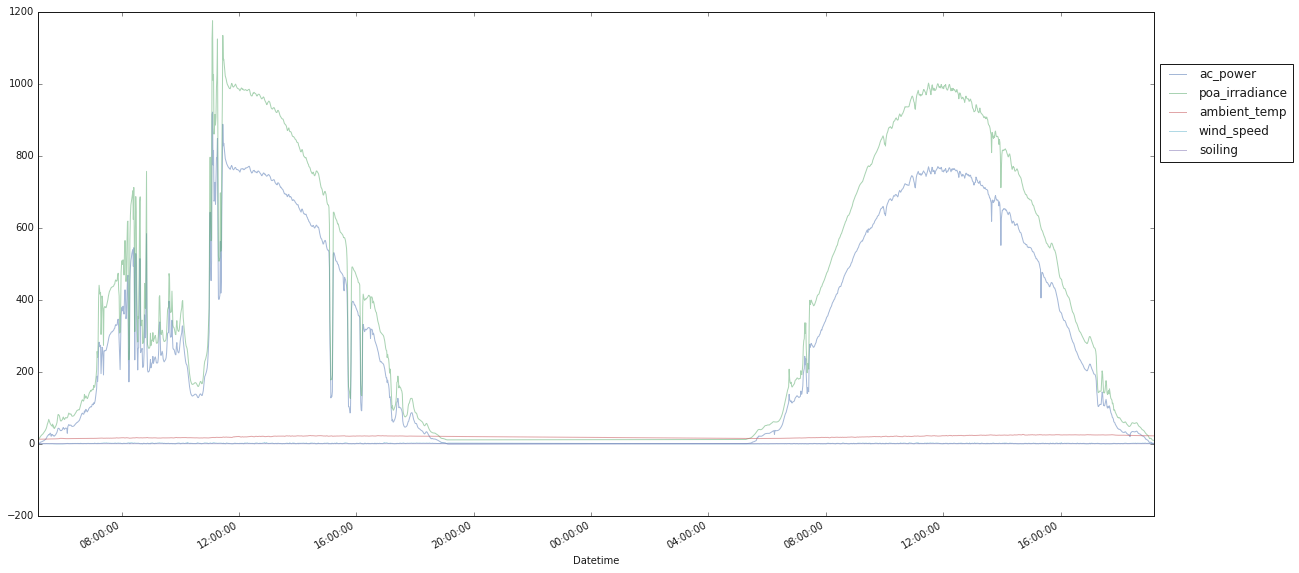

In [ ]:
f=plt.figure()
data['2014-07-01':'2014-07-02'].plot(alpha=0.5, style='-', figsize=(20,10))
plt.legend(loc='center left', bbox_to_anchor=(1, .8))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fc77cc9ee90> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


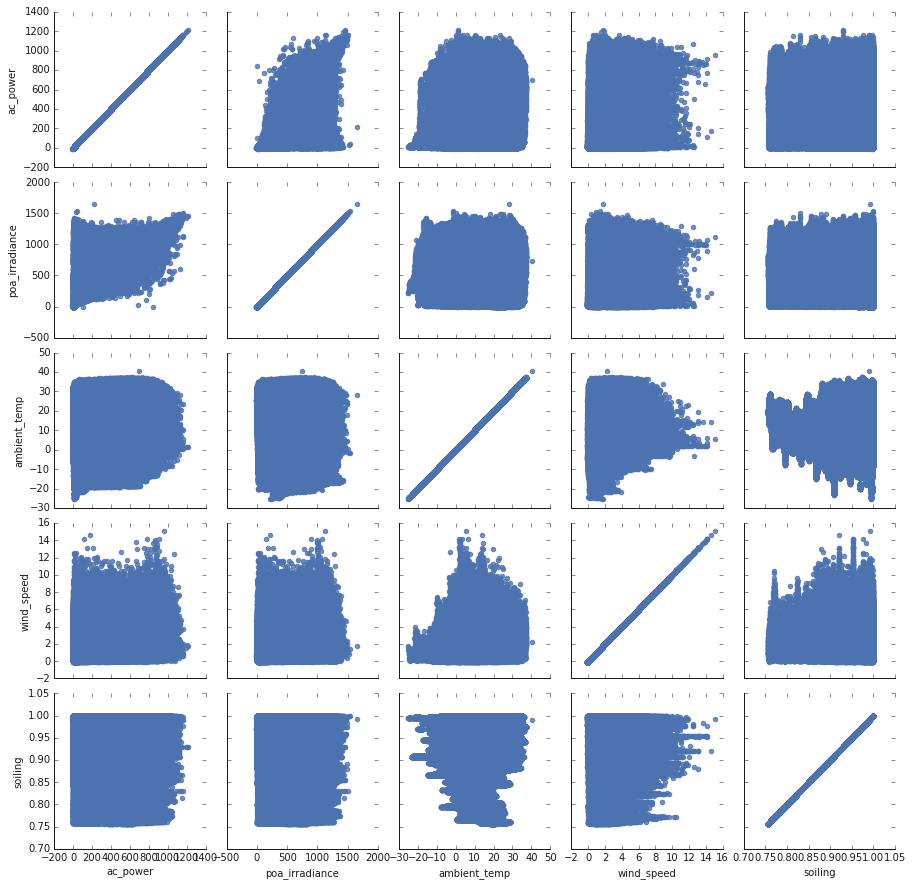

In [ ]:
g = sns.PairGrid(data, vars=['ac_power', 'poa_irradiance', 'ambient_temp', 'wind_speed','soiling'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

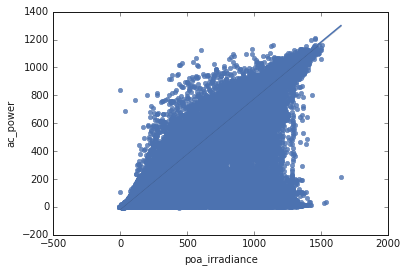

In [ ]:
sns.regplot(x="poa_irradiance", y="ac_power", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


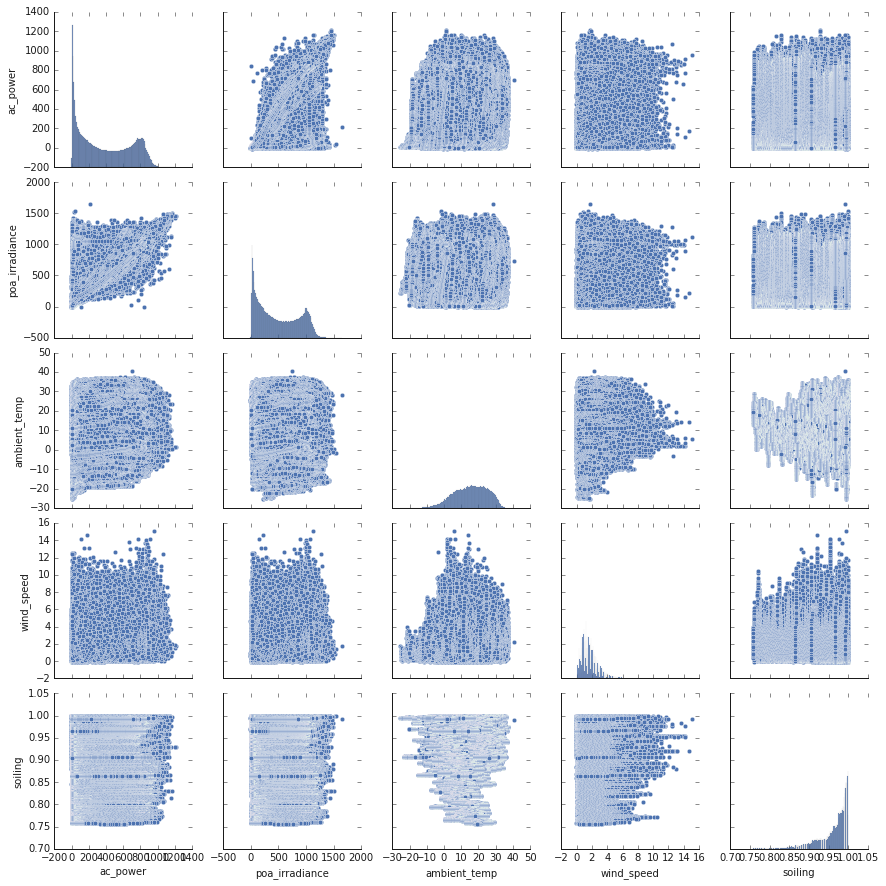

In [ ]:
sns.pairplot(data, size=2.5);

In [ ]:
data.describe()

,ac_power,poa_irradiance,ambient_temp,wind_speed,soiling
count,1.541277e+06,1.541277e+06,1.541277e+06,1.541277e+06,1.541277e+06
mean,3.767340e+02,4.846946e+02,1.533884e+01,1.778307e+00,9.599768e-01
std,3.018819e+02,3.686146e+02,9.689413e+00,1.204422e+00,4.317632e-02
min,-9.299000e+00,-8.364000e+00,-2.530800e+01,-1.050000e-01,7.570000e-01
25%,8.409300e+01,1.382060e+02,8.320000e+00,9.440000e-01,9.430000e-01
50%,3.175930e+02,4.089000e+02,1.596200e+01,1.510000e+00,9.760000e-01
75%,6.679960e+02,8.331530e+02,2.298200e+01,2.331000e+00,9.910000e-01
max,1.210800e+03,1.646610e+03,4.058700e+01,1.504700e+01,1.000000e+00


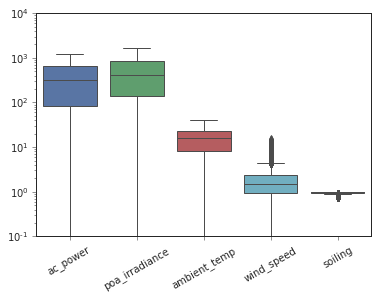

In [ ]:
import matplotlib.pylab as plt
with sns.axes_style(style='ticks'):
    g = sns.boxplot(data=data)
    g.set(yscale="log")
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

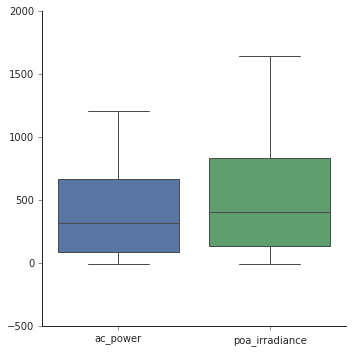

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=data[{'poa_irradiance','ac_power'}], kind="box")
    #g.set_axis_labels(data.columns);

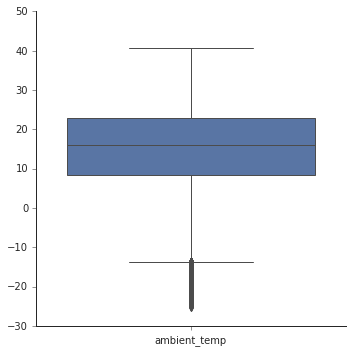

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=data[{'ambient_temp'}], kind="box")
    #g.set_axis_labels(data.columns);

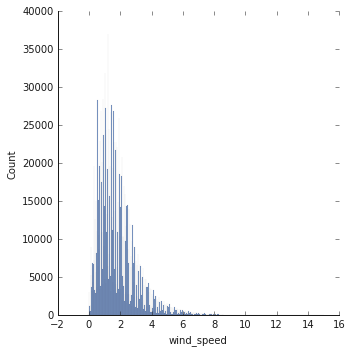

In [ ]:
sns.displot(data['wind_speed'])

In [ ]:
# Compute a correlation matrix and convert to long-form
corr_mat = data.corr().stack().reset_index(name="correlation")
corr_mat[corr_mat['level_0']=='ac_power']

,level_0,level_1,correlation
0,ac_power,ac_power,1.000000
1,ac_power,poa_irradiance,0.970545
2,ac_power,ambient_temp,0.139751
3,ac_power,wind_speed,0.203768
4,ac_power,soiling,-0.021665


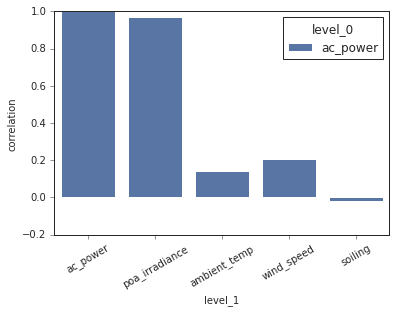

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.barplot(x="level_1", y="correlation", 
                    hue="level_0",
                    data=corr_mat[corr_mat['level_0']=='ac_power'])
    g.set_xticklabels(g.get_xticklabels(),rotation=30)

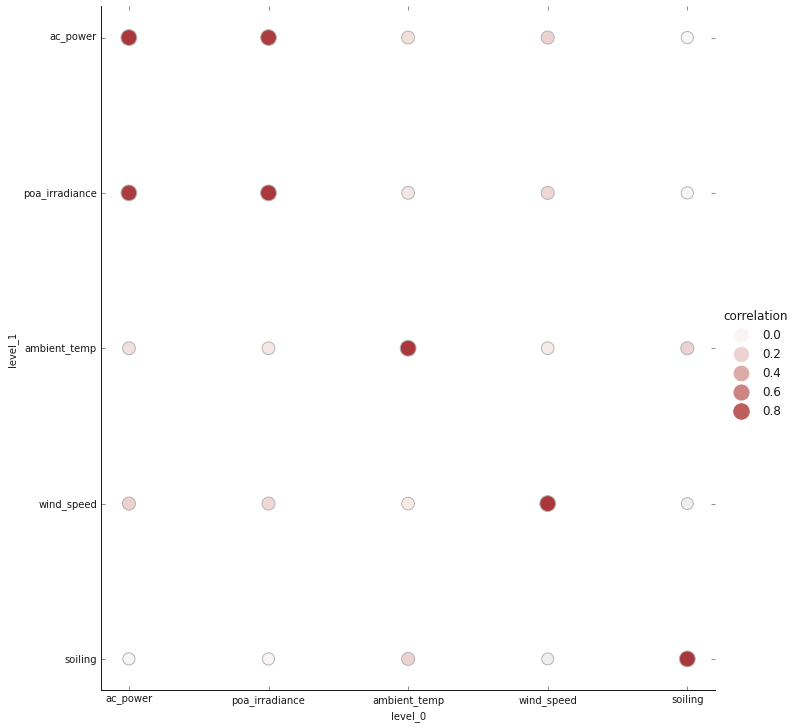

In [ ]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-1, 1),
)

### SANITIZE: Data Wrangling (Preparation, Transformation, and Cleansing)

### DESCRIPTIVE ANALYTICS: Gain insight from data ("Understand the past")

### PREDICTIVE ANALYTICS: Modeling to make predictions ("Predict the future")

### PRESCRIPTIVE ANALYTICS: Modeling to make recommendations ("Change the future")